In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/CEASalespersonsPropertyTransactionRecordsresidential.csv')

In [4]:
df.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,-,-
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,-,-
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,-,-
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,-,-


In [5]:
# check for any missing data
is_null = df.isnull().any()
print(f'Checking missing data: \n {is_null}')

Checking missing data: 
 salesperson_name       False
transaction_date       False
salesperson_reg_num    False
property_type          False
transaction_type       False
represented            False
town                   False
district               False
general_location       False
dtype: bool


In [6]:
print(df.dtypes)

salesperson_name       object
transaction_date       object
salesperson_reg_num    object
property_type          object
transaction_type       object
represented            object
town                   object
district               object
general_location       object
dtype: object


In [7]:
len(df['salesperson_reg_num'].unique())

27119

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%b-%Y')

In [9]:
df['year'] = df['transaction_date'] .dt.year

# Task 1
### Based on the dataset, how many sales would you expect an agent to close each year? How much variation is there among agents?

In [10]:
# Group by year and agent, then count the number of transactions
df['year'] = df['transaction_date'].dt.year
annual_sales_per_agent = df.groupby(['year', 'salesperson_reg_num']).size().reset_index(name='sales_count')

# Compute descriptive statistics for each year
descriptive_stats = annual_sales_per_agent.groupby('year')['sales_count'].describe()
reorder = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
descriptive_stats = descriptive_stats[reorder]

print(descriptive_stats)

        count       mean        std  min  25%  50%   75%    max
year                                                           
2017   8675.0   3.592392   5.900418  1.0  1.0  2.0   4.0  214.0
2018   9133.0   3.906931   6.990583  1.0  1.0  2.0   4.0  254.0
2019   8232.0   3.709791   6.521161  1.0  1.0  2.0   4.0  210.0
2020  18332.0   9.919921  14.446556  1.0  2.0  5.0  12.0  548.0
2021  19384.0  10.511040  14.915594  1.0  2.0  6.0  13.0  444.0
2022  20598.0   9.216040  13.017693  1.0  2.0  5.0  12.0  465.0
2023  17333.0   5.036924   6.317967  1.0  1.0  3.0   6.0  224.0


In [11]:
average_mean = descriptive_stats['mean'].mean()
average_std = descriptive_stats['std'].mean()
print(f"The average mean sales over the years is: {average_mean:.2f}. Thus, I would expect the agent to close about {average_mean:.2f} number of sales per year. However, there is a relatively high variability across the years as seen from standard deviaion of {average_std:.2f}, thus the actual number may not be close to the estimate.")

The average mean sales over the years is: 6.56. Thus, I would expect the agent to close about 6.56 number of sales per year. However, there is a relatively high variability across the years as seen from standard deviaion of 9.73, thus the actual number may not be close to the estimate.


By year

/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

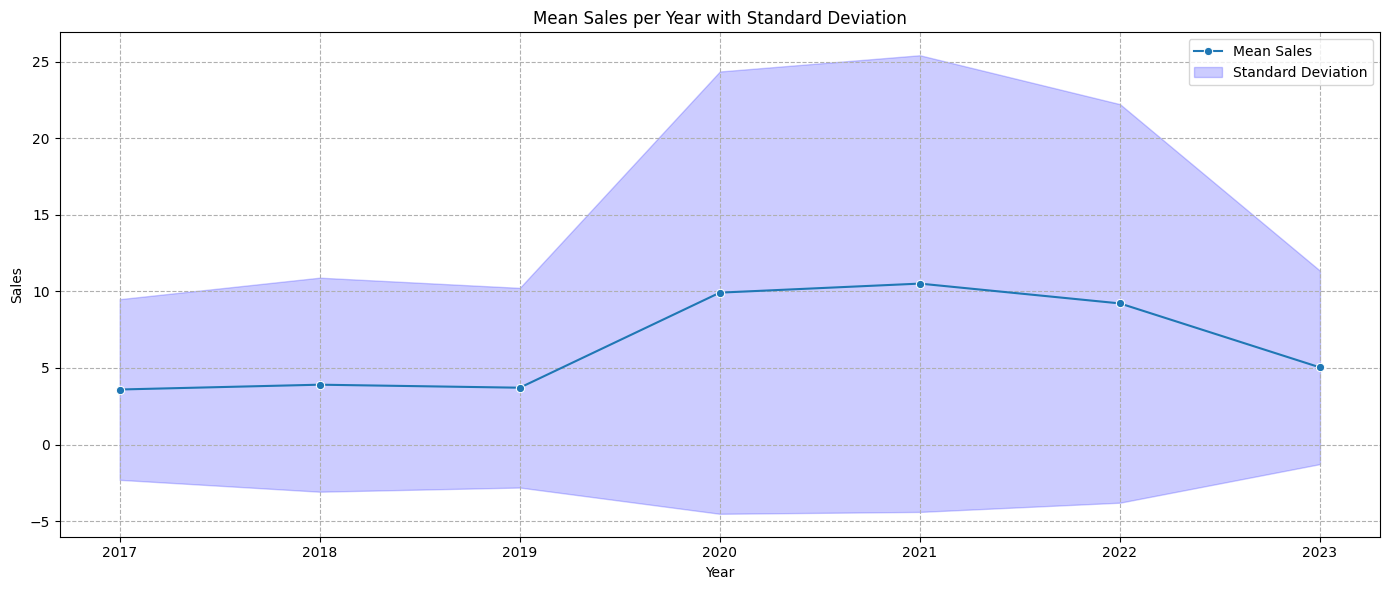

In [12]:
# Plotting mean sales over years
plt.figure(figsize=(14, 6))
sns.lineplot(data=descriptive_stats, x=descriptive_stats.index, y='mean', marker='o', label='Mean Sales')
plt.fill_between(descriptive_stats.index, descriptive_stats['mean'] - descriptive_stats['std'], 
                 descriptive_stats['mean'] + descriptive_stats['std'], color='blue', alpha=0.2, label='Standard Deviation')
plt.title('Mean Sales per Year with Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()




/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


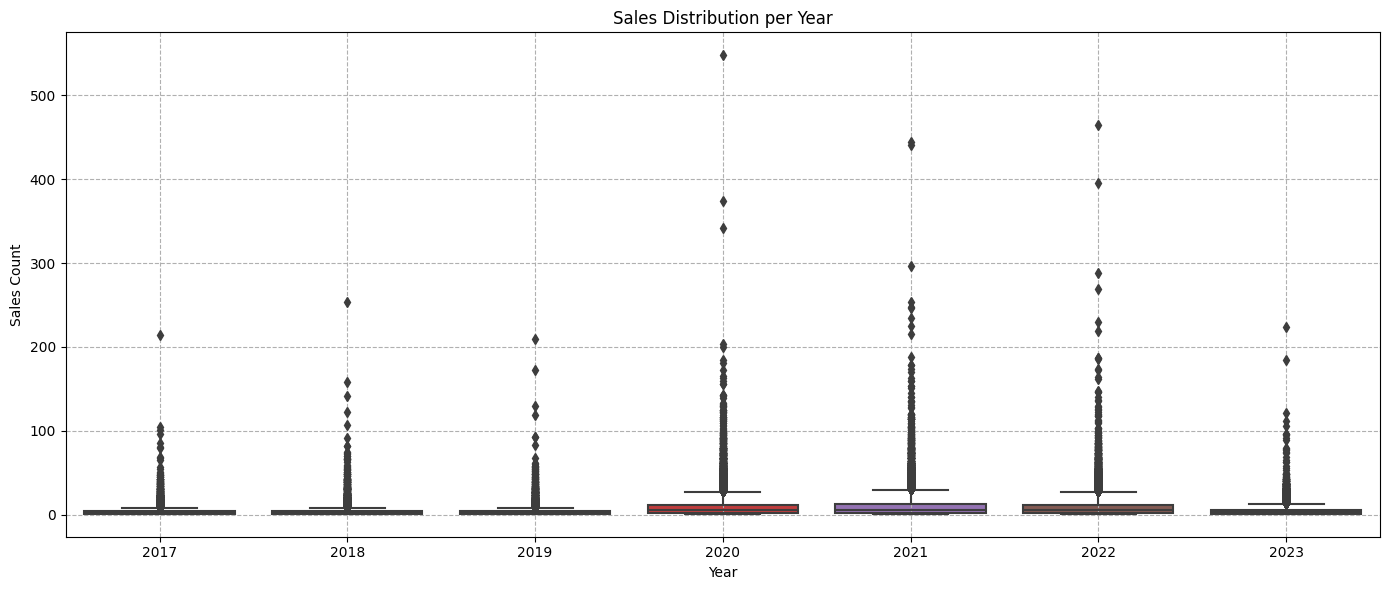

In [13]:
# Box plot for sales over years
plt.figure(figsize=(14, 6))
sns.boxplot(data=annual_sales_per_agent, x='year', y='sales_count')
plt.title('Sales Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


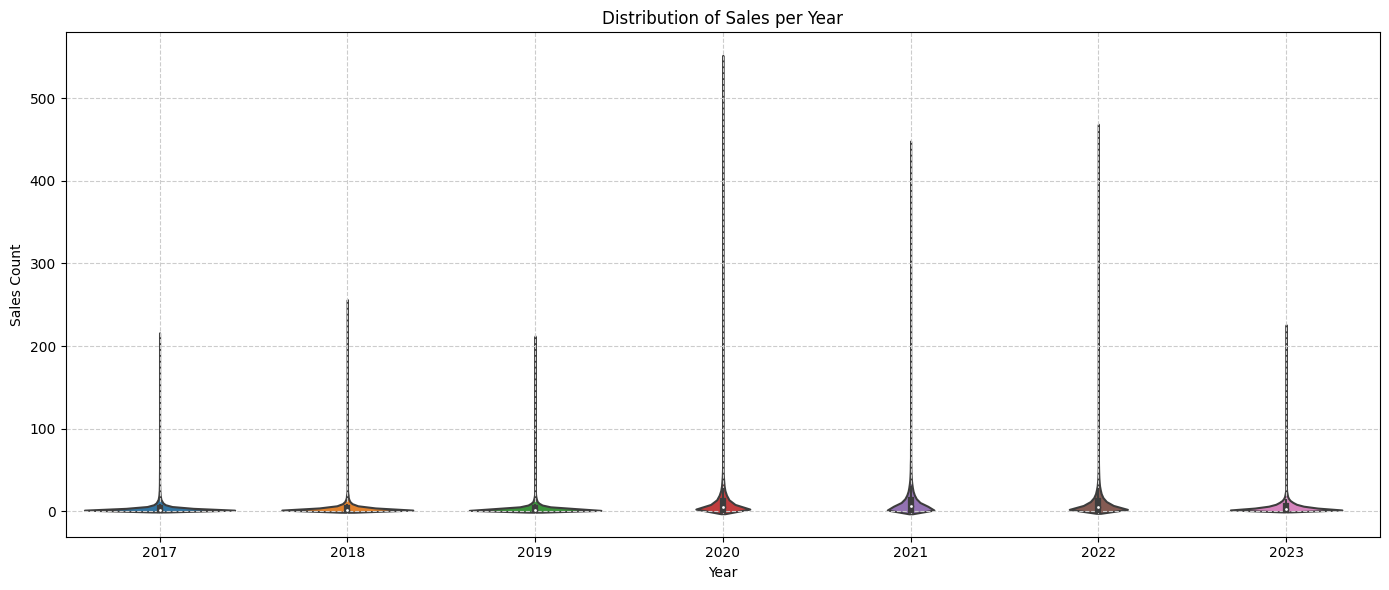

In [14]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='year', y='sales_count', data=annual_sales_per_agent)
plt.title('Distribution of Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.grid(True, which="both", ls="--", c='0.8')
plt.tight_layout()
plt.show()

By agent

In [15]:
agent_stats = df.groupby('salesperson_reg_num')['transaction_date'].count().describe()
print(agent_stats)

count    27119.000000
mean        28.029057
std         47.062585
min          1.000000
25%          3.000000
50%         12.000000
75%         35.000000
max       2045.000000
Name: transaction_date, dtype: float64


In [16]:
print(f"The average mean sales for an agent is: {agent_stats['mean']:.2f}. However, there is a high standard deviation of {agent_stats['std']:.2f}, IQR of {agent_stats['75%']- agent_stats['25%']} and range of {agent_stats['max']- agent_stats['min']}. " )

The average mean sales for an agent is: 28.03. However, there is a high standard deviation of 47.06, IQR of 32.0 and range of 2044.0. 


/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


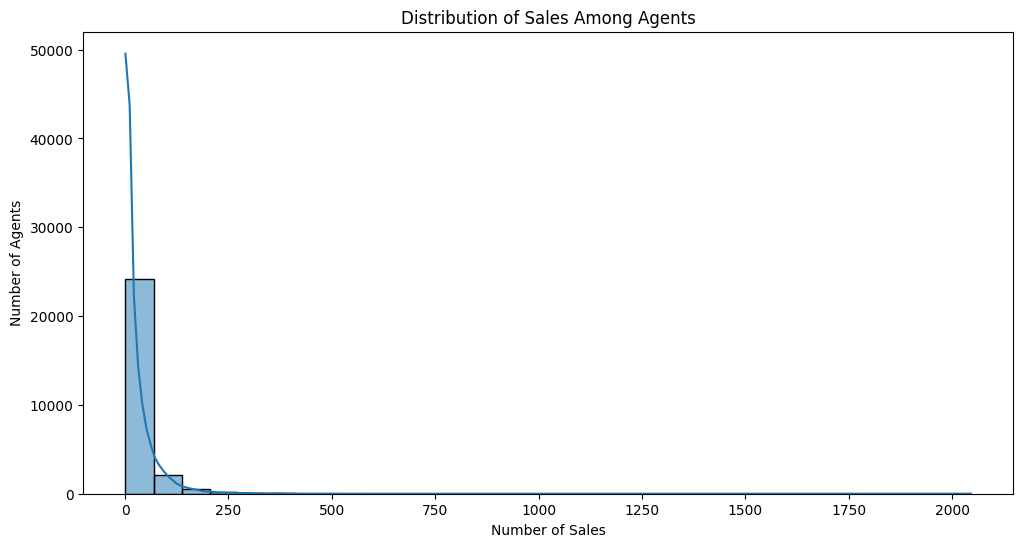

/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


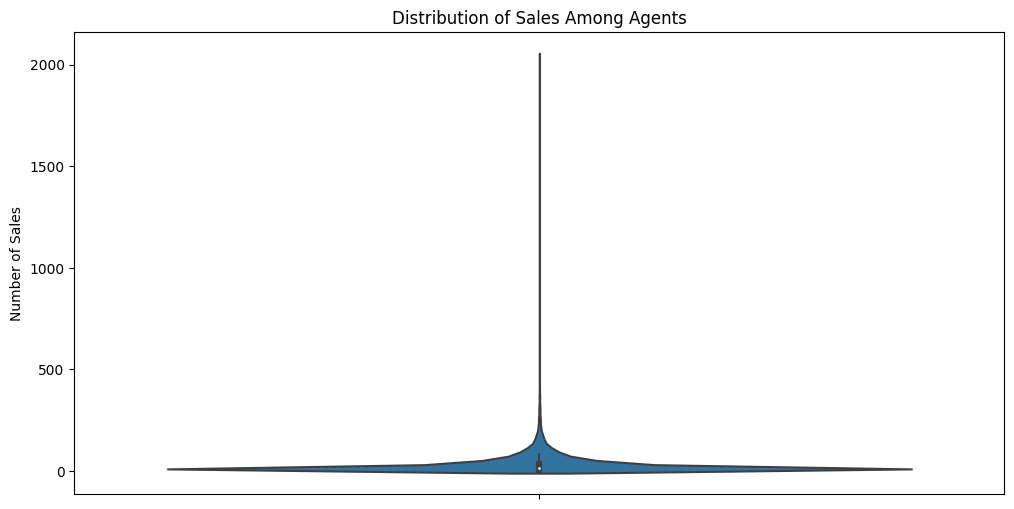

In [17]:
# Histogram
plt.figure(figsize=(12,6))
sns.histplot(df.groupby('salesperson_reg_num')['transaction_date'].count(), bins=30, kde=True)
plt.title('Distribution of Sales Among Agents')
plt.xlabel('Number of Sales')
plt.ylabel('Number of Agents')
plt.show()

# Violin Plot 
plt.figure(figsize=(12,6))
sns.violinplot(y=df.groupby('salesperson_reg_num')['transaction_date'].count())
plt.title('Distribution of Sales Among Agents')
plt.ylabel('Number of Sales')
plt.show()


# Task 2:
### Examine the distribution for number of sales closed by an agent in a year & suggest a probability distribution that may be suitable for modelling this set of values. What are some ways in which your suggested distribution is appropriate? What are some of its limitations?

/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_4523/545152771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(annual_sales_per_agent['sales_count'], kde=True, bins=30)
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

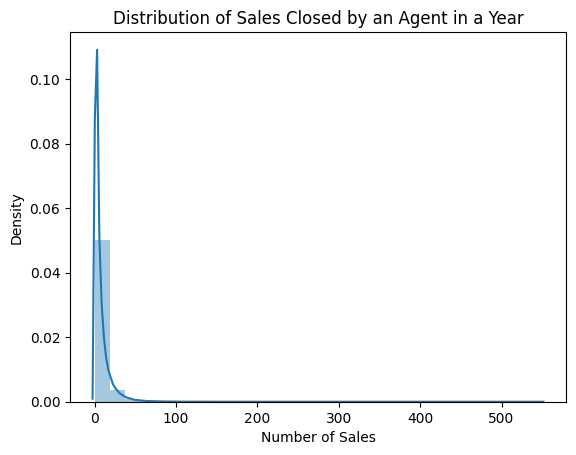

In [18]:
sns.distplot(annual_sales_per_agent['sales_count'], kde=True, bins=30)
plt.title('Distribution of Sales Closed by an Agent in a Year')
plt.xlabel('Number of Sales')
plt.ylabel('Density')
plt.show()


The above graph shows the distribution for number of sales closed by an agent in a year. Poisson distribution may be suitable for modelling this set of values for the following reasons:
- The above graoh is right skewed which is similar to a Poisson distribution
- The question involves the number of events (sales, in this case) within a fixed interval of time (a year) which is similar to the number of events happening in a fixed interval of time.
- The Poisson distribution assumes a discrete event which is true in the context of the question for housing sales transaction.


However there are some limitations to the Poisson distribution as it assumes the following which may not hold in reality:
- The distribution assumes that events occur at a constant rate. However, housing sales might not occur at a consistent rate throughout the year as there is likely to be peak and non-peak seasons. 
- It assumes independence of events which may not hold true in reality as the occurrence of one sales may affect another for instance, government housing, BTO, Regulatory changes (such as additional stamp's buyer duty, Singles scheme,etc.)

# Task 3:
### Property agents tend to specialise in one or more specific geographical areas, rather than ply their trade equally island-wide. Given a property agent who has closed sales in Sembawang and Yishun during a given year, which other town is he/she most likely to be active in that year? (Note: you may wish to use association rules for this task.)

In [19]:
# Pivot dataframe to have towns as columns, with 1s for transactions
df_pivot = df.groupby(['salesperson_reg_num', 'year', 'town']).size().unstack(fill_value=0)

# Convert non-zero values to 1
df_pivot = (df_pivot > 0).astype(int)

from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_pivot, min_support=0.001, use_colnames=True)
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

print(rules)

filtered_rules = rules[rules['antecedents'].apply(lambda x: 'SEMBWANG' in x and 'YISHUN' in x)]
print(filtered_rules)

/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


: 

: 